In [1]:
import sys, os, math, h5py, csv
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
sys.path.append('/Users/ajc/Core/PreProcessing/PyScript')
import readdata

In [2]:
#path = '/Users/ajc/FUSE/simulations/tests/ats-demos/13_reactive_transport/01_surface'
path = '/Users/ajc/FUSE/simulations/tests/ats-demos/13_reactive_transport/04_hyporheic'

In [3]:
# Read PFOTRAN standalone data
pflotran_file = os.path.join(path, 'data/pflotran_out/denitrification.tec')
plfotran_data = dict()
plfotran_data['time'] = np.loadtxt(pflotran_file,usecols=0,skiprows=1) #time in hours
plfotran_data['DOM1'] = np.loadtxt(pflotran_file,usecols=1,skiprows=1)  # Tracer 1
plfotran_data['O2(aq)'] = np.loadtxt(pflotran_file,usecols=2,skiprows=1)  # Tracer 1
plfotran_data['NO3-'] = np.loadtxt(pflotran_file,usecols=3,skiprows=1)  # Tracer 1

In [9]:
F= ['srun2'] # logical run
#F= ['srun4e']
Files = [os.path.join(path,f,'visdump_surface_data.h5') for f in F]
vars = ['surface-total_component_concentration', 'surface-total_component_concentration','surface-total_component_concentration']
Suffix = ['.cell.Tracer1 conc']#,'.cell.DOM1 conc', '.cell.NO3- conc', '.cell.O2(aq) conc']
Suffix = ['.cell.DOM1 conc', '.cell.NO3- conc', '.cell.O2(aq) conc']

0.5
0.1


/Users/ajc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/Users/ajc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


0.2654112300516755


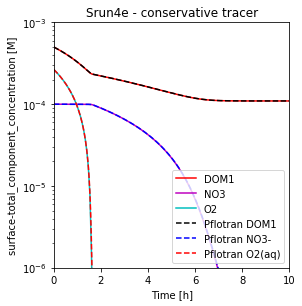

In [14]:
#%matplotlib tk
fig, axs = plt.subplots(1,1, figsize=(4,4), facecolor='w', edgecolor='k',gridspec_kw={'width_ratios':[1]})
fig.subplots_adjust(hspace =.02, wspace=1.02)
plt.tight_layout()
#axs = axs.ravel()

Colors = ['r','m','c']
F_L = ['DOM1', 'NO3', 'O2']
for i, v in enumerate(vars):

    plt.subplot(111)
    for j,f in enumerate(Files):
        data = np.array(readdata.GetSurfVarFromVis(f,v,cellid=0,suffix=Suffix[i])[v])
        Time = np.array([240*i/3600. for i in range(len(data))])
        plt.semilogy(Time, 1e-3*data,color=Colors[i],label=F_L[i])
        print (data[0])
        #plt.plot(Time, 1e0*data,color=Colors[i],label=F_L[i]) # plot conservative tracer
    plt.ylabel(vars[i] + ' [M]') # Molarity = Moles/liter
    plt.xlabel('Time [h]')
    
plt.semilogy(plfotran_data['time'], plfotran_data['DOM1'],'k',linestyle='--',label='Pflotran DOM1')
plt.semilogy(plfotran_data['time'], plfotran_data['NO3-'],'b',linestyle='--',label='Pflotran NO3-')
plt.semilogy(plfotran_data['time'], plfotran_data['O2(aq)'],'r',linestyle='--',label='Pflotran O2(aq)')
plt.legend(loc='lower right',fontsize=10)
plt.title('Srun4e - conservative tracer')
plt.ylim(1e-6,1e-3)
plt.xlim(0,10)

plt.show()

In [ ]:

# Srun4a : velocity = 0.000001 -- > same as point test, replicating point test at 100 cells, bc = no specified 
# **** Passed
#NOTE mass_density_liquid=1 --> resutls in singular value 
#---------------


# Srun4b : velocity = 0.000001 -- > same as point test, replicating point test at 100 cells, bc = specified, 
# updated pflotran.in file
# **** Passed
#---------------



# Srun4c : velocity = 0.1, ~Srun4b

# Srun4d : velocity = 0.1, ~Srun4b, + Tracer1

